In [36]:
import glob
import json
import numpy as np
import cv2
import pdb
from matplotlib import pyplot as plt
import os

data_path = 'out_weiz//'
out_img_path = 'tmp/'

% matplotlib inline

In [37]:
flist = [x.split('/')[-1] for x in  glob.glob(data_path + '/*')]
cates = set([x.split('_')[0] for x in flist if len(x.split('_')) > 1])

In [38]:
cates

{'bend',
 'jack',
 'jump',
 'pjump',
 'run',
 'side',
 'skip',
 'walk',
 'wave1',
 'wave2'}

In [39]:
data={}
for cate in cates:
    data[cate] = glob.glob(data_path + '/' + cate + '*.json' )

In [40]:
data.keys()

['pjump',
 'run',
 'wave1',
 'skip',
 'walk',
 'jump',
 'bend',
 'wave2',
 'side',
 'jack']

In [41]:
trainX = []
trainY = []
for idx, k in enumerate(data.keys()):
    print 'label: %d, category: %s' % (idx,k)
    # for each class
    len_arr = []
    for it in data[k]:
        print it
        xt = [x['p'] for x in json.load(open(it, 'r'))]
        trainX.append(xt)
        trainY.append(it)
        len_arr.append(len(xt))
    print 'average length = %f' % np.mean(len_arr)

label: 0, category: pjump
out_weiz/pjump_shahar_pjump.json
out_weiz/pjump_ido_pjump.json
out_weiz/pjump_lena_pjump.json
out_weiz/pjump_ira_pjump.json
out_weiz/pjump_eli_pjump.json
out_weiz/pjump_moshe_pjump.json
out_weiz/pjump_denis_pjump.json
out_weiz/pjump_lyova_pjump.json
out_weiz/pjump_daria_pjump.json
average length = 13.555556
label: 1, category: run
out_weiz/run_daria_run.json
out_weiz/run_moshe_run.json
out_weiz/run_lyova_run.json
out_weiz/run_ido_run.json
out_weiz/run_lena_run2.json
out_weiz/run_lena_run1.json
out_weiz/run_eli_run.json
out_weiz/run_ira_run.json
out_weiz/run_denis_run.json
out_weiz/run_shahar_run.json
average length = 12.200000
label: 2, category: wave1
out_weiz/wave1_ido_wave1.json
out_weiz/wave1_shahar_wave1.json
out_weiz/wave1_denis_wave1.json
out_weiz/wave1_lena_wave1.json
out_weiz/wave1_daria_wave1.json
out_weiz/wave1_moshe_wave1.json
out_weiz/wave1_eli_wave1.json
out_weiz/wave1_lyova_wave1.json
out_weiz/wave1_ira_wave1.json
average length = 16.222222
labe

up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121800
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529121807
up_IPC_20170529120443
up_IPC_20170529120443
up_IPC_20170529120443
up_IPC_20170529120443
up_IPC_201

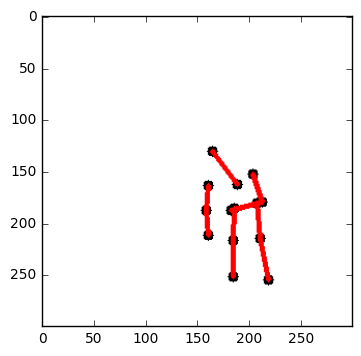

In [35]:
for idx in range(len(trainX)):
    for i,x in enumerate(trainX[idx]):
        n = trainY[idx].split('/')[-1].split('.')[0]
        print n
        #break 
        pose2Img2(x,i,n)
    #break

In [15]:
trainY[50]

'out/cross_IPC_20170529124327.json'

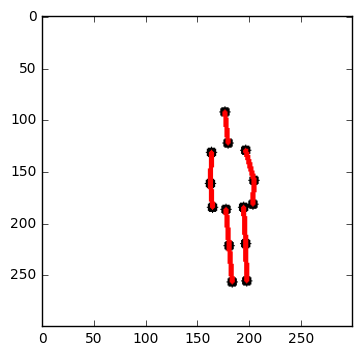

In [14]:
pose2Img2(trainX[0][8],0,'a')

In [27]:
def pose2Img2(framePose, it, name):
    pairRef = [1, 2, 3, 4, 4, 5, 6, 7, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14]
    pairRef = np.reshape(pairRef,(-1,2)) - 1
    im = 255* np.ones((300,300,3), np.uint8)
    for cord in framePose:

        cv2.circle(im, tuple(cord), 1, (0, 0, 0), 7)
    for lineMark in pairRef:
        # print tuple(framePose[lineMark[0]][:-1])
        cv2.line(im, tuple(framePose[lineMark[0]]),  tuple(framePose[lineMark[1]]), (0, 0, 255), 3) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    out_path = os.path.join(out_img_path, name + str(it+1).zfill(4) + '.jpg')
    cv2.imwrite(out_path, im)

In [31]:
heads = [x['p'][0] for x in xt]

In [32]:
heads

[[180, 76],
 [169, 59],
 [159, 50],
 [157, 64],
 [165, 57],
 [162, 58],
 [162, 60],
 [163, 62],
 [162, 60],
 [164, 98],
 [162, 68],
 [179, 92],
 [171, 103],
 [192, 103],
 [177, 117],
 [170, 113],
 [165, 116],
 [164, 110],
 [157, 108],
 [156, 108]]

In [27]:
np.mean(xt[0]['p'],axis=0)

array([ 201.14285714,  188.28571429])

In [19]:
for x in xt:
    

array([180,  76, 170, 122, 164, 146, 179, 198, 220, 206, 168, 136, 187,
       179, 221, 193, 186, 216, 259, 220, 241, 267, 183, 207, 245, 208,
       213, 262])

In [85]:
a=[[178,  85],
        [171, 131],
        [160, 153],
        [186, 153],
        [190, 123],
        [185, 134],
        [187, 156],
        [193, 125],
        [170, 222],
        [198, 276],
        [209, 304],
        [175, 221],
        [196, 276],
        [201, 308]]

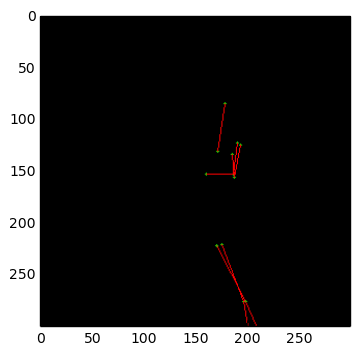

In [86]:
pose2Img2(a, 0, 'tmp')

In [87]:
b=np.asarray([ 0.07215321,  0.12210544,  0.03330148,  0.37741681, -0.02775124,
        0.49952225,  0.11655519,  0.49952225,  0.13875618,  0.33301484,
        0.11100495,  0.39406756,  0.12210544,  0.51617299,  0.15540692,
        0.34411533,  0.02775124,  0.88248931,  0.18315816,  1.18220267,
        0.24421088,  1.33760959,  0.05550247,  0.87693907,  0.17205766,
        1.18220267,  0.1998089 ,  1.35981058])

In [88]:
b = b.reshape((14,2))
b=b*100
anc_head = 150;b=b+anc_head
b = b.astype(int)

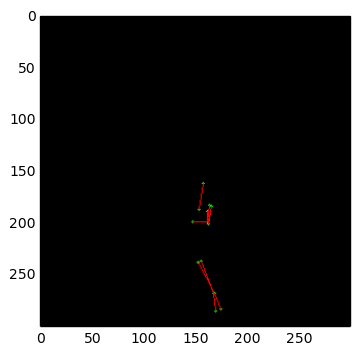

In [89]:
pose2Img2(b, 0, 'tmp')